# Thickness maps

Use `data/layer_index.csv` to calculate the thickness of each layer.

In [1]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd

%matplotlib inline

In [2]:
zfile_directory = "../Zipped zmap surfaces/Zipped zmap surfaces/"
geotiff_directory = "../data/GAB_surfaces/GeoTiff/"
numpy_directory = "../data/GAB_surfaces/NumPy/"
png_directory = "../data/GAB_surfaces/png/"


df_layers = pd.read_csv("../data/GAB_surfaces/layer_index.csv", index_col=0)
n_layers = df_layers.shape[0]

In [3]:
df_layers

,Layer name,Display name,Lithology,Age,k_h (log10 m/s),dk_h,k_h distribution,k_T (W/m/K),dk_T,k_T distribution,H (uW/m3),dH,H distribution
Index,,,,,,,,,,,,,
0,AUSBATH09_AMG55_GDA94_500m_model_extent,Cenozoic,Sandstone,Cenozoic,-8,5,Uniform,2,1.5,Uniform,1,1,Uniform
1,Base_Cenozoic_v19,Late Cretaceous,Sandstone,Late Cretaceous,-8,5,Uniform,2,1.5,Uniform,1,1,Uniform
2,W100_BASE_MACKUNDA_v13,Early Cretaceous,Sandstone,Early Cretaceous,-8,5,Uniform,2,1.5,Uniform,1,1,Uniform
3,W210_BUNGIL_v8,Early Cretaceous,Sandstone,Early Cretaceous,-8,5,Uniform,2,1.5,Uniform,1,1,Uniform
4,W310_WESTBOURNE_v6,Late Jurassic,Sandstone,Late Jurassic,-8,5,Uniform,2,1.5,Uniform,1,1,Uniform
5,W330_SPRINGBOK_v5,Late Jurassic,Sandstone,Late Jurassic,-8,5,Uniform,2,1.5,Uniform,1,1,Uniform
6,W410_SPUNCON_v5,Late Jurassic,Sandstone,Late Jurassic,-8,5,Uniform,2,1.5,Uniform,1,1,Uniform
7,W510_HUTUP_v16,Middle Jurassic,Sandstone,Middle Jurassic,-8,5,Uniform,2,1.5,Uniform,1,1,Uniform
8,W540_EVERUP_v11,Early Jurassic,Sandstone,Early Jurassic,-8,5,Uniform,2,1.5,Uniform,1,1,Uniform


In [4]:
z_file = rasterio.open(geotiff_directory + df_layers['Layer name'][n_layers-1] + '.tiff')
z_data = z_file.read(1, masked=True)
extent = z_file.bounds.left, z_file.bounds.right, z_file.bounds.bottom, z_file.bounds.top
z_file.close()

__To-do:__

- add shaded relief of Austrlia
- add bathymetry
- hull of GAB

(similar to Nadege's _Great Artesian Basin.pdf_ )

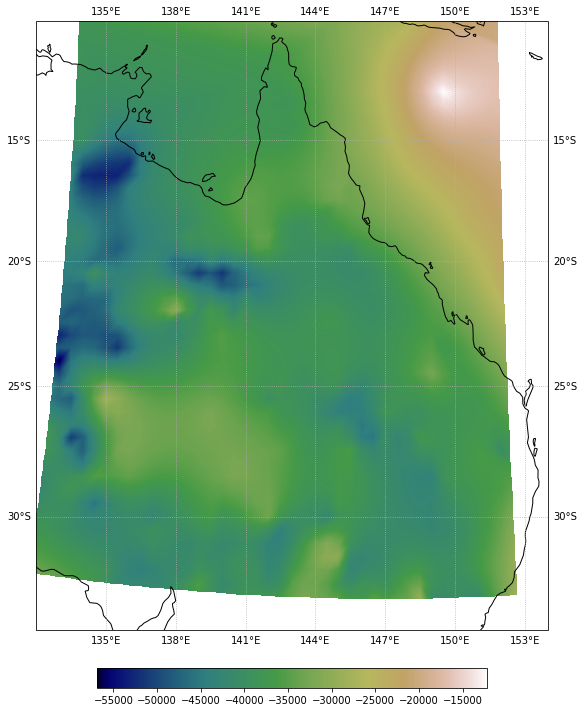

In [5]:
extent_gab = [132, 154, -34, -10]


fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(111, projection=ccrs.Mercator(145))
ax1.set_extent(extent_gab)
im1 = ax1.imshow(z_data, extent=extent, cmap="gist_earth", transform=ccrs.epsg(28355))

ax1.coastlines()
ax1.gridlines(draw_labels=True, linestyle=':')
cbar = fig.colorbar(im1, orientation='horizontal', pad=0.05, shrink=0.5)

In [6]:
def read_geotiff(filename):
    z_file = rasterio.open(filename)
    z_data = z_file.read(1, masked=True)
    extent = z_file.bounds.left, z_file.bounds.right, z_file.bounds.bottom, z_file.bounds.top
    z_file.close()
    return z_data, extent

In [7]:
for i in df_layers.index[0:-1]:
    r0 = df_layers.loc[i]
    r1 = df_layers.loc[i+1]

    z0, extent0 = read_geotiff(geotiff_directory+r0['Layer name']+'.tiff')
    z1, extent1 = read_geotiff(geotiff_directory+r1['Layer name']+'.tiff')
    
    # thickness
    dz = -(z1 - z0)

    # figure
    fig = plt.figure(figsize=(14,14))
    ax1 = fig.add_subplot(111, projection=ccrs.Mercator(145))
    ax1.set_extent(extent_gab)
    im1 = ax1.imshow(dz, extent=extent, cmap="gist_earth_r", transform=ccrs.epsg(28355))

    ax1.coastlines()
    ax1.gridlines(draw_labels=True, linestyle=':')
    fig.colorbar(im1, orientation='horizontal', pad=0.05, shrink=0.5)
    fig.savefig(png_directory+"{:02d}_thickness_{}.png".format(i, r0['Age']), dpi=300, bbox_inches='tight')
    plt.close(fig)
    
    print("{:02d} Finished {:s}".format(i, r0['Age']))

00 Finished Cenozoic
01 Finished Late Cretaceous
02 Finished Early Cretaceous
03 Finished Early Cretaceous
04 Finished Late Jurassic
05 Finished Late Jurassic
06 Finished Late Jurassic
07 Finished Middle Jurassic
08 Finished Early Jurassic
09 Finished Early Jurassic
10 Finished Late Triassic
11 Finished Early Triassic
12 Finished Late Permian
